# Classification Problem


# Car Classification


PROBLEM STATEMENT: To predict value fom the dataset that is categorical in nature.


# Binary Classification:



Binary Classification refers to predicting one of the two classes/columns.



# To predict the ORIGIN of the car from the dataset(USA/Non-USA)

# Import Libraries


In [2]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# Collecting Data



Reading in the Cars93.csv file into a pandas dataframe.

In [3]:
A = pd.read_csv("E:/Desktop/Cars93.csv")

In [4]:
A.head()

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,NaN,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


# Missing Data Treatment


Cleaning the data by removing NaN values and unnecessary columns from the dataset

In [5]:
A.isnull() #True -- If it is null
           #False -- If it is not null

,id,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
89,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
90,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
91,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
A.isnull().sum() #airbags,rear.seat.room,luggage.room have missing values in them.

id                     0
Manufacturer           0
Model                  0
Type                   0
Min.Price              0
Price                  0
Max.Price              0
MPG.city               0
MPG.highway            0
AirBags                4
DriveTrain             0
Cylinders              0
EngineSize             0
Horsepower             0
RPM                    0
Rev.per.mile           0
Man.trans.avail        0
Fuel.tank.capacity     0
Passengers             0
Length                 0
Wheelbase              0
Width                  0
Turn.circle            0
Rear.seat.room         2
Luggage.room          11
Weight                 0
Origin                 0
Make                   0
dtype: int64

To analyze them visually, use seaborn to create a simple heatmap to see where is the data missing.


<AxesSubplot:>

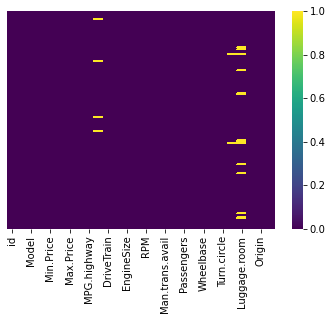

In [7]:
sb.heatmap(A.isnull(), yticklabels = False , cmap = "viridis")

In [8]:
#to remove these columns
from PM8 import replacer
replacer(A)

In [9]:
A.isna().sum()

id                    0
Manufacturer          0
Model                 0
Type                  0
Min.Price             0
Price                 0
Max.Price             0
MPG.city              0
MPG.highway           0
AirBags               0
DriveTrain            0
Cylinders             0
EngineSize            0
Horsepower            0
RPM                   0
Rev.per.mile          0
Man.trans.avail       0
Fuel.tank.capacity    0
Passengers            0
Length                0
Wheelbase             0
Width                 0
Turn.circle           0
Rear.seat.room        0
Luggage.room          0
Weight                0
Origin                0
Make                  0
dtype: int64

<AxesSubplot:>

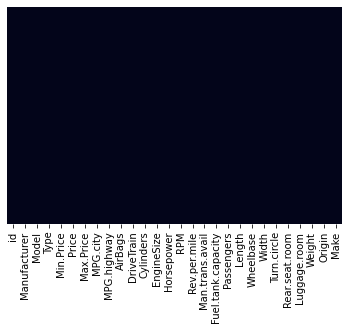

In [10]:
#to check if the values have been removed or not.
sb.heatmap(A.isnull(), yticklabels=False , cbar = False)

# Dropping Unnecessary Colums:

In [11]:
Y = A[["Origin"]]
X = A.drop(labels=["id","Make","Model","Manufacturer","Origin"],axis=1)

# Analyzing Data


Creating different plots to check the relationship between variables. Simply explore the data by using various columns


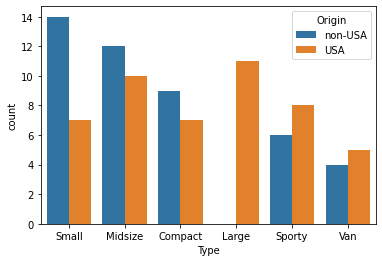

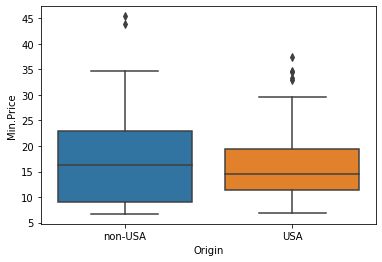

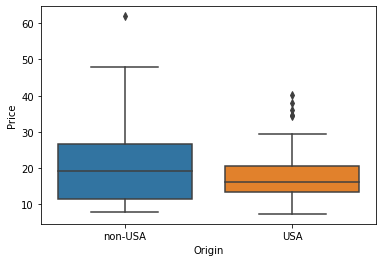

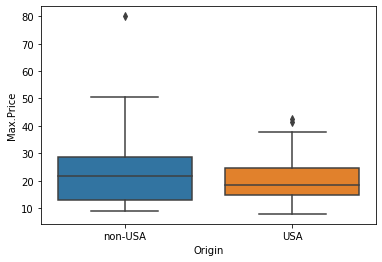

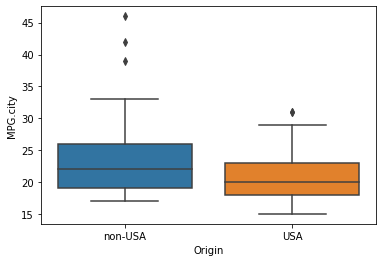

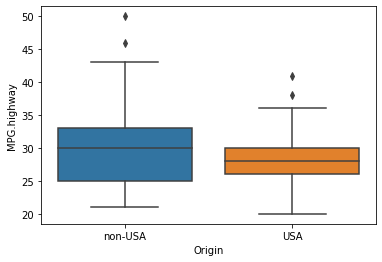

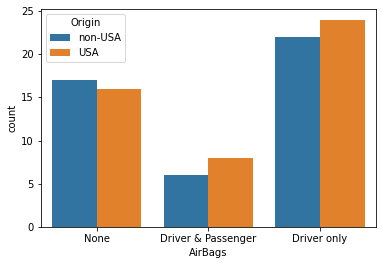

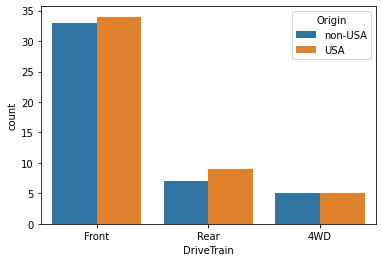

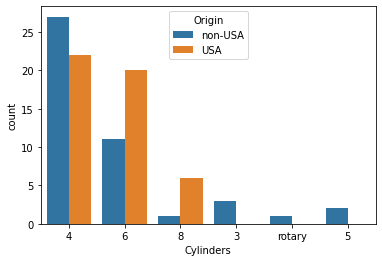

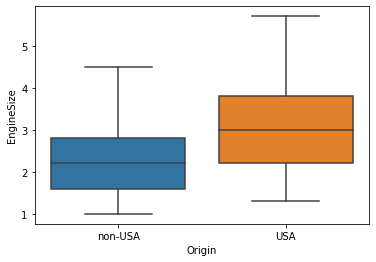

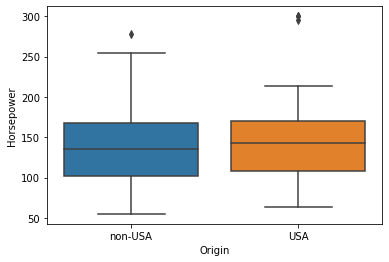

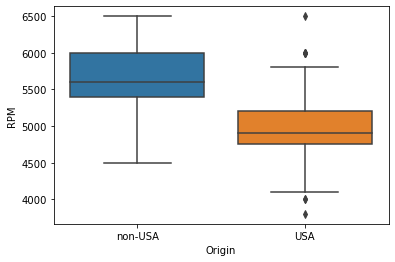

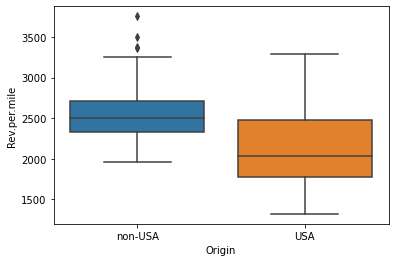

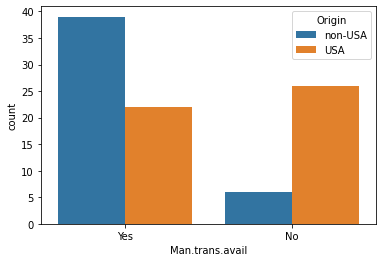

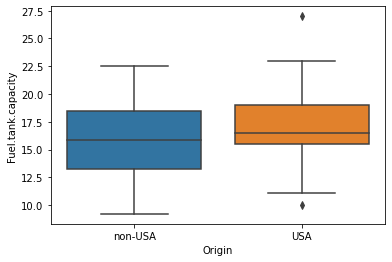

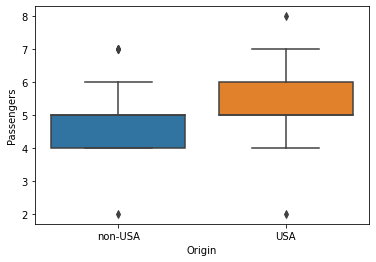

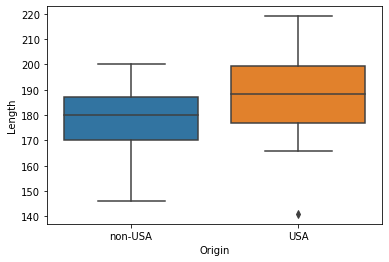

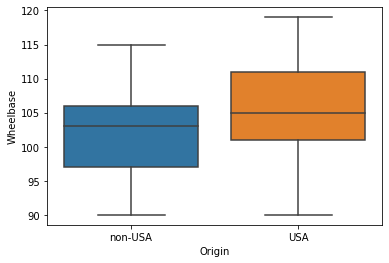

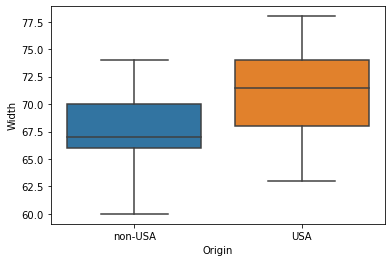

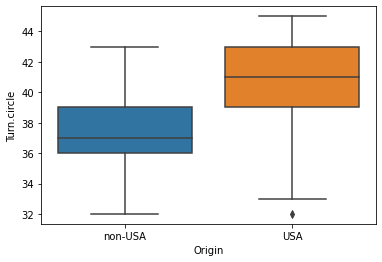

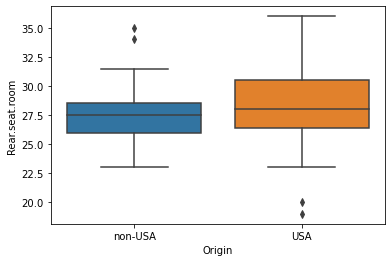

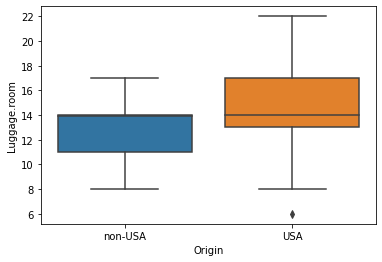

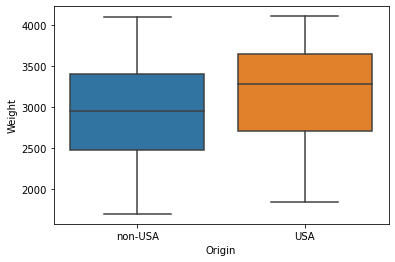

In [12]:
for i in X.columns:
    if(X[i].dtypes == "object"):
        sb.countplot(X[i],hue=Y.Origin)
        plt.show()
    else:
        sb.boxplot(Y.Origin,X[i])
        plt.show()

In [13]:
X = A[["Width"]]

# Building a Logistic Regression Model


# Train Test Split



Splitting the data into training set and testing set.

In [14]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=21)

# Logistic Regression



Logistic Regression is used as it solves classification problems & is used to predict categorical variable.

In [15]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
model = lr.fit(xtrain,ytrain)
pred = model.predict(xtest)

In [16]:

pred


array(['non-USA', 'USA', 'non-USA', 'USA', 'USA', 'non-USA', 'USA', 'USA',
       'USA', 'USA', 'USA', 'USA', 'USA', 'USA', 'non-USA', 'USA', 'USA',
       'USA', 'non-USA'], dtype=object)

In [17]:
ytest['Predicted'] = pred

In [18]:
ytest

,Origin,Predicted
23,USA,non-USA
86,non-USA,USA
91,non-USA,non-USA
21,USA,USA
17,USA,USA
82,non-USA,non-USA
34,USA,USA
27,USA,USA
10,USA,USA
40,non-USA,USA


# Accuracy Check

In [19]:
#to calculate accuracy using confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(ytest.Origin,pred)

array([[8, 2],
       [6, 3]], dtype=int64)

In [20]:
(8+3)/(8+2+6+3)

0.5789473684210527

In [21]:
#to calculate accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(ytest.Origin,pred)

0.5789473684210527